# day38
## reminding part

In [113]:
# 워드 임베딩 : 텍스트 -> 코퍼스 -> 단어 (Bag of Words) -> 수치화

# 코퍼스에 등장하는 단어의 개수 
# i (0) am (1) a (2) boy (3) // 구축
# i am a girl => [1110]


In [114]:

# 신경망에서 language 모델구성
# - 신경망 언어 모델 

# 입력 히든 출력
# x    h1  y
# .    . 
# .    .
# x(v) h(m) y(v)


# ex - 1 )  1 * 2 = 2 

In [115]:
# 1. word2vec 실습용
corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']


# 2. 장문 학습(LSTM)
# sentence = ("The regret after not doing something is bigger than that of doing something "
#             "Ability is decided by one's own effort "
#             "The difficulty in life is the choice.")

In [116]:
def remove_stopWords(corpus):
    stopWords = ['is','a','will','be']
    res = []
    for text in corpus : # corpus 가 문장 단위로 읽어진다 text에 들어가
        temp = text.split(" ")
        for sw in stopWords :
            if sw in temp : # stopwords 가 있으면
                temp.remove(sw)
                # 각각의 리스트 요소에서 제거하고 나머지 리스트가 도출되어질 것이다 
        res.append(" ".join(temp))
    return res

In [117]:
corpus = remove_stopWords(corpus)
corpus
# vocab = corpus를 이루는 unique한 단어들의 집합을 만드는과정 


['king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess young queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen']

In [118]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)
words = set(words) # set 함수 중복 단어 제거되어진다 



In [119]:
words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

In [120]:
# # CBOW
# input output 
# king strong
#      man
# strong king
#        man
# man    king
#        strong
# window size = 2n 

# window size = 1n, output = 1 개!  

In [121]:

word2int = {}
# 각각의 단어들을 int형으로 변환시킨 리스트
# enumerate(words) # 열거형 = for 문가능
for i, word in enumerate(words): # i를 통해서 각각의 단어들에 인덱스 부여 (0-11)
    word2int[word] = i
word2int

{'pretty': 0,
 'man': 1,
 'queen': 2,
 'princess': 3,
 'girl': 4,
 'king': 5,
 'young': 6,
 'wise': 7,
 'strong': 8,
 'boy': 9,
 'woman': 10,
 'prince': 11}

In [122]:
# corpus에 저장되어있는 리스트 요소들을 하나씩 불러와서 단어들 인덱스값을 기초로 
# 단어들과 주변단어들의 인덱싱을 추출하는 작업수행
# corpus 단어 읽기
corpus

['king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess young queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen']

In [123]:
sentences=[]
for sentence in corpus:
    sentences.append(sentence.split())
sentences
    # 10개의 문장

[['king', 'strong', 'man'],
 ['queen', 'wise', 'woman'],
 ['boy', 'young', 'man'],
 ['girl', 'young', 'woman'],
 ['prince', 'young', 'king'],
 ['princess', 'young', 'queen'],
 ['man', 'strong'],
 ['woman', 'pretty'],
 ['prince', 'boy', 'king'],
 ['princess', 'girl', 'queen']]

In [124]:
# 한줄씩 한줄씩 리스트단위로 읽자
window_size = 2 
data = []
for sentence in sentences : # [king , strong , man]
    for idx, word in enumerate(sentence): # 0, king
        # 리스트 내 리스트. 안쪽 리스트 인덱싱을 확인하는 구문
        # print(idx, word)
        for neighbor in sentence[max(idx-window_size, 0) : min(idx+window_size, 
                                                               len(sentence)) + 1]: 
            # max (-2 , 0) = 0 : min (2, 3) = 2 + 1 = 3 => 0:3 => 0,1,2
            if neighbor != word:
                data.append([word, neighbor])
print(data)
# 하는 이유 두개씩 도출되는 cBOW 만들기 위한 코딩구문 
# word to vec 시, king _____ man => ____ 를 만들기위한구문        
        

[['king', 'strong'], ['king', 'man'], ['strong', 'king'], ['strong', 'man'], ['man', 'king'], ['man', 'strong'], ['queen', 'wise'], ['queen', 'woman'], ['wise', 'queen'], ['wise', 'woman'], ['woman', 'queen'], ['woman', 'wise'], ['boy', 'young'], ['boy', 'man'], ['young', 'boy'], ['young', 'man'], ['man', 'boy'], ['man', 'young'], ['girl', 'young'], ['girl', 'woman'], ['young', 'girl'], ['young', 'woman'], ['woman', 'girl'], ['woman', 'young'], ['prince', 'young'], ['prince', 'king'], ['young', 'prince'], ['young', 'king'], ['king', 'prince'], ['king', 'young'], ['princess', 'young'], ['princess', 'queen'], ['young', 'princess'], ['young', 'queen'], ['queen', 'princess'], ['queen', 'young'], ['man', 'strong'], ['strong', 'man'], ['woman', 'pretty'], ['pretty', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'prince'], ['boy', 'king'], ['king', 'prince'], ['king', 'boy'], ['princess', 'girl'], ['princess', 'queen'], ['girl', 'princess'], ['girl', 'queen'], ['queen', 'princess']

In [125]:
import pandas as pd
for text in corpus:
    print(text)

king strong man
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen


In [126]:
df=pd.DataFrame(data, columns = ['input', 'label'])
df
# (52,2)

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [127]:
word2int
#  이 값을 기준으로 ohe  되어져야함

# word2vec structure
# input dimension = 12 
# Embedding dimension = 2 
# output dimension = 12 
# weight 1 (12x2) [압축과정]
# weight 2 (12x2) [압축해제과정]
## transpose (x)


{'pretty': 0,
 'man': 1,
 'queen': 2,
 'princess': 3,
 'girl': 4,
 'king': 5,
 'young': 6,
 'wise': 7,
 'strong': 8,
 'boy': 9,
 'woman': 10,
 'prince': 11}

In [128]:
## ohe
# 입, 출력단어에 대해서,,,
# tensorflow ,,,신경망구성과정
# 입력 / 히든 / 출력 레이어 계층에대한 구성과정
# cross entropy 
# running 

# ex) 한국 - 서울 + 북경 => 중국
# sg(0,1) # 1 : skipgram # 0 : CBOW
# word2vec 공간내 


In [129]:
import numpy as np

ONE_HOT_DIM = len(words) # vocab length = 12
# path = 'C:/Users/user/Desktop/data analysis bigppt/ted'
# ted_text.xml

def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding
#     print(one_hot_encoding)
X=[] # input word
Y=[] # target word
for x,y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[x]))
    Y.append(to_one_hot_encoding(word2int[y]))
    # vocab에서 x 찾자 = ohe 해야할 수치를 찾고 함수에 전달해주자
# type(X)
xtrain = np.asarray(X)
ytrain = np.asarray(Y)
# to_one_hot_encoding

In [130]:
import tensorflow as tf
# tensor flow NN 구성
x = tf.placeholder(tf.float32, shape = [None, ONE_HOT_DIM])
y = tf.placeholder(tf.float32, shape = [None, ONE_HOT_DIM])

EMBEDDING_DIM = 2 # 2차원 wordEmbedding Vector

w1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM])) 
# [12, 2] # updata 대상은 variable 로 선언해줘야한다 
b1 = tf.Variable(tf.random_normal([1])) 
hidden_layer=tf.add(tf.matmul(x,w1), b1) # [None, 2]
# hidden layer 구성

w2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))  # [2, 12]
b2 = tf.Variable(tf.random_normal([1]))
hf = tf.nn.softmax(tf.add(tf.matmul(hidden_layer, w2), b2))

# output layer 구성 
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hf), 1))

# train node definition
train=tf.train.GradientDescentOptimizer(0.05).minimize(cost)



In [131]:
# 트레이닝
sess = tf.Session()
sess.run(tf.global_variables_initializer())
iteration = 30000
for i in range(iteration):
    sess.run(train, feed_dict = {x:xtrain,y:ytrain})
    if i % 1000 == 0:
        print('iteration'+str(i)+'cost is:',
             sess.run(cost, feed_dict ={x:xtrain, y:ytrain}))


iteration0cost is: 4.1115503
iteration1000cost is: 2.1203897
iteration2000cost is: 1.9603095
iteration3000cost is: 1.9084046
iteration4000cost is: 1.8820517
iteration5000cost is: 1.8649919
iteration6000cost is: 1.8517004
iteration7000cost is: 1.8406372
iteration8000cost is: 1.8309579
iteration9000cost is: 1.821569
iteration10000cost is: 1.8109504
iteration11000cost is: 1.7976432
iteration12000cost is: 1.7830192
iteration13000cost is: 1.7696668
iteration14000cost is: 1.7585034
iteration15000cost is: 1.7489794
iteration16000cost is: 1.7408262
iteration17000cost is: 1.7340692
iteration18000cost is: 1.7286197
iteration19000cost is: 1.7242126
iteration20000cost is: 1.7205386
iteration21000cost is: 1.7173703
iteration22000cost is: 1.7145652
iteration23000cost is: 1.7120335
iteration24000cost is: 1.7097175
iteration25000cost is: 1.7075782
iteration26000cost is: 1.7055887
iteration27000cost is: 1.7037302
iteration28000cost is: 1.7019885
iteration29000cost is: 1.7003524


In [132]:
vectors = sess.run(hidden_layer, feed_dict = {x:xtrain, y:ytrain})
# vectors.shape()
vectors 

array([[-0.35866827,  0.97329116],
       [-0.35866827,  0.97329116],
       [ 3.0875452 ,  3.7633035 ],
       [ 3.0875452 ,  3.7633035 ],
       [-1.8500689 ,  3.6387577 ],
       [-1.8500689 ,  3.6387577 ],
       [-0.61767244, -0.52514243],
       [-0.61767244, -0.52514243],
       [-5.327001  , -2.7513258 ],
       [-5.327001  , -2.7513258 ],
       [-0.22196099, -0.3015695 ],
       [-0.22196099, -0.3015695 ],
       [-0.21261242,  0.9767301 ],
       [-0.21261242,  0.9767301 ],
       [-0.06734326,  0.13600427],
       [-0.06734326,  0.13600427],
       [-1.8500689 ,  3.6387577 ],
       [-1.8500689 ,  3.6387577 ],
       [-1.3553299 , -0.573362  ],
       [-1.3553299 , -0.573362  ],
       [-0.06734326,  0.13600427],
       [-0.06734326,  0.13600427],
       [-0.22196099, -0.3015695 ],
       [-0.22196099, -0.3015695 ],
       [-3.033745  ,  6.5172048 ],
       [-3.033745  ,  6.5172048 ],
       [-0.06734326,  0.13600427],
       [-0.06734326,  0.13600427],
       [-0.35866827,

In [133]:
vectors = sess.run(w1+b1)
print(vectors) # 12, 2 

[[-3.4666364  -3.385653  ]
 [-1.8500689   3.6387577 ]
 [-0.61767244 -0.52514243]
 [-3.3100972  -0.28823513]
 [-1.3553299  -0.573362  ]
 [-0.35866827  0.97329116]
 [-0.06734326  0.13600427]
 [-5.327001   -2.7513258 ]
 [ 3.0875452   3.7633035 ]
 [-0.21261242  0.9767301 ]
 [-0.22196099 -0.3015695 ]
 [-3.033745    6.5172048 ]]


In [134]:
# 시각화 .... 비슷한 단어들의 비슷한 위치 확인 
w2v_df = pd.DataFrame(vectors, columns = ['v1','v2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word','v1','v2']]
w2v_df

,word,v1,v2
0,pretty,-3.466636,-3.385653
1,man,-1.850069,3.638758
2,queen,-0.617672,-0.525142
3,princess,-3.310097,-0.288235
4,girl,-1.355330,-0.573362
5,king,-0.358668,0.973291
6,young,-0.067343,0.136004
7,wise,-5.327001,-2.751326
8,strong,3.087545,3.763304
9,boy,-0.212612,0.976730


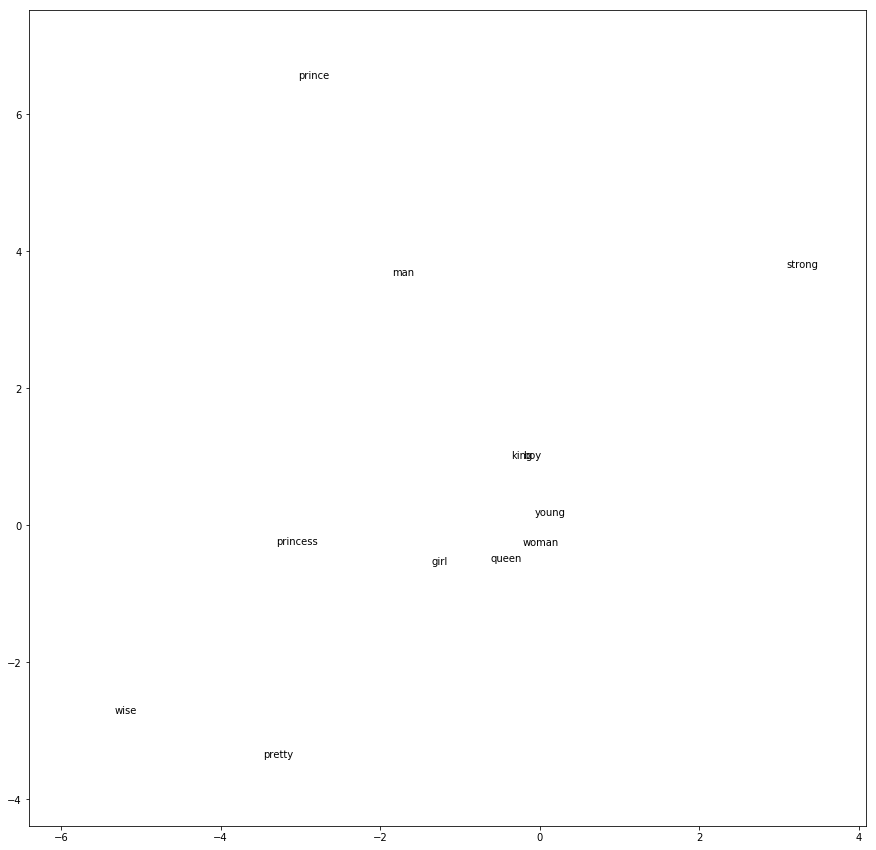

In [135]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for word , v1, v2 in zip(w2v_df['word'], w2v_df['v1'], w2v_df['v2']):
    ax.annotate(word, (v1,v2)) # 벡터위에 단어가 보인다
padding = 1.0
xmin = np.amin(vectors, axis = 0)[0] - padding
y_min = np.amin(vectors, axis = 0)[1] - padding
x_max = np.amax(vectors, axis = 0)[0] + padding
y_max = np.amax(vectors, axis = 0)[1] + padding

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.rcParams['figure.figsize'] = (15,15)
plt.show()



In [136]:
# (52,2) 로 연산량이 증가하는 word2vec의 설계상의 결점을 보완하기위해
# # Negative Sampling 방식이 w2v 방식에 결합되어졋다
# Negative Sampling : 중요치 않은 요소들은 모두 빼고 일부만 연산한다 =pluning 개념
# pluning : aprioir algorithm, lift 부분집합 갯수가 너무 많아 지면서, 가지치기 쳐서
#     연산량을 줄였다 

In [137]:
## 날코딩 끝 


## 라이브러리 사용 word2vec 구현

In [138]:
# word2vec =  중심 -> 주변 (w1) # 맞춰간다 ... weight Updating
#             주변 -> 중심 (w2) 
# 단어를 벡터화 ... 단어의 문맥적 의미 보존
# by using, 유클리디안, 코사인유사도 
# k-means : clustering(군집화)
    

In [139]:

# path = 'C:/Users/user/Desktop/data analysis bigppt/ted'
# ted_text.xml

# w2 벡터를 시각화 ( w1 과 비교 )


In [140]:
import re
from lxml import etree # etree 로 press 하면 속도 향상
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [141]:
text = 'C:/Users/user/Desktop/data analysis bigppt/ted/ted_text.xml'
targetXml = open( text,'r', encoding='utf8' )
# ted_text.xml')
target_text = etree.parse(targetXml)
# parse_text = target_text.xpath('//content/text()')
parse_text = '\n'.join(target_text.xpath('//content/text()'))
# target_text
# <content> ~ </content> 내용을 추출
content_text = re.sub('\([^)]*\)','', parse_text)
# (단어) 제거
sent_text = sent_tokenize(content_text)
len(sent_text)


273424

In [147]:
# parse_text
# 구두점 제거, 대문자 => 소문자 
normalized_text = []
for s in sent_text:
    tokens = re.sub("[^a-z0-9]+", " ", s.lower()) # string - s
    # a-z0-9 가 아닌것들에 해당하는 것들에 대해서, 
    normalized_text.append(tokens)

In [146]:
normalized_text[:10]

['here are two reasons companies fail they only do more of the same or they only do what s new ',
 'to me the real real solution to quality growth is figuring out the balance between two activities exploration and exploitation ',
 'both are necessary but it can be too much of a good thing ',
 'consider facit ',
 'i m actually old enough to remember them ',
 'facit was a fantastic company ',
 'they were born deep in the swedish forest and they made the best mechanical calculators in the world ',
 'everybody used them ',
 'and what did facit do when the electronic calculator came along ',
 'they continued doing exactly the same ']

In [148]:
res = []
res = [word_tokenize(sent) for sent in normalized_text]
# 문장이 word 단위로 쪼개짐


In [149]:
print(res[:10])

[['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new'], ['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation'], ['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing'], ['consider', 'facit'], ['i', 'm', 'actually', 'old', 'enough', 'to', 'remember', 'them'], ['facit', 'was', 'a', 'fantastic', 'company'], ['they', 'were', 'born', 'deep', 'in', 'the', 'swedish', 'forest', 'and', 'they', 'made', 'the', 'best', 'mechanical', 'calculators', 'in', 'the', 'world'], ['everybody', 'used', 'them'], ['and', 'what', 'did', 'facit', 'do', 'when', 'the', 'electronic', 'calculator', 'came', 'along'], ['they', 'continued', 'doing', 'exactly', 'the', 'same']]


In [150]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=res, size=100, window=5, min_count=10, sg=0, workers=4)
model
# sg=0 : CBOW sg=1 : skip_gram


C:\Users\user\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [ ]:
model.most_similar("단어")
model.init_sims(replace=True) # 메모리해제
model.similarity("boy", "man") # 유사도 계산
# ex ) she + (actor - actress) = he
model.most_similar(positive=['she','actor'],
                  negetive='actress',topn=5)


In [ ]:
# nltk.download('movie_reviews')